In [1]:
import os
import yaml
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
import yaml
with open('../config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.Loader)
ratio_dict = {}
df = pd.read_csv(config['data_dir']['8hos'],index_col=[0])
for i in [2,3,6,8,9,10,11,12]:
    ratio_dict['site'+str(i)] = len(df[df['LOC'] == i])/len(df)

## Onehot encoding result

In [3]:
local1 = pd.read_csv('../output_folder/onehot_new/local_val_df_(0.001,0.0005).csv', index_col=[0])
local2 = pd.read_csv('../output_folder/onehot_new/local_val_df_(0.0001,0.0005).csv', index_col=[0])
local3 = pd.read_csv('../output_folder/onehot_new/local_val_df_(0.001,0).csv', index_col=[0])
local4 = pd.read_csv('../output_folder/onehot_new/local_val_df_(0.0001,0).csv', index_col=[0])
onehot_local_df = pd.DataFrame(data=[local1.mean(),local2.mean(),local3.mean(),local4.mean()], index=['(0.001,0.0005)', '(0.0001,0.0005)', '(0.001,0)', '(0.0001,0)'])
onehot_local_df # .to_csv('onehot_local_comp.csv')

,site2,site3,site6,site8,site9,site10,site11,site12
"(0.001,0.0005)",0.516280,0.656270,0.607167,0.568831,0.576500,0.686864,0.632694,0.568525
"(0.0001,0.0005)",0.512750,0.746620,0.698087,0.663018,0.687181,0.723818,0.714870,0.664590
"(0.001,0)",0.517077,0.647836,0.598193,0.579293,0.586946,0.685643,0.629020,0.560000
"(0.0001,0)",0.494194,0.703472,0.677385,0.624836,0.615203,0.712283,0.690548,0.657049


In [4]:
central1 = pd.read_csv('../output_folder/onehot_new/centralized_score_(0.001,0.0005).csv', index_col=[0])
central2 = pd.read_csv('../output_folder/onehot_new/centralized_score_(0.0001,0.0005).csv', index_col=[0])
central3 = pd.read_csv('../output_folder/onehot_new/centralized_score_(0.001,0).csv', index_col=[0])
central4 = pd.read_csv('../output_folder/onehot_new/centralized_score_(0.0001,0).csv', index_col=[0])

onehot_central_df = pd.DataFrame(data=[central1.mean(),central2.mean(),central3.mean(),central4.mean()], index=['(0.001,0.0005)', '(0.0001,0.0005)','(0.001,0)', '(0.0001,0)'])
onehot_central_df['std'] = [onehot_central_df.loc[i].std() for i in onehot_central_df.index]
average_list = []
for ind in onehot_central_df.index:
    temp = 0
    for i in ratio_dict.keys():
        temp+=onehot_central_df.loc[ind][i]*ratio_dict[i]

    average_list.append(temp)
onehot_central_df['weighted average'] = average_list
onehot_central_df       #.to_csv('onehot_central_comp.csv')

,site2,site3,site6,site8,site9,site10,site11,site12,std,weighted average
"(0.001,0.0005)",0.708561,0.692154,0.671227,0.659784,0.700503,0.704444,0.688432,0.465902,0.080712,0.683488
"(0.0001,0.0005)",0.663138,0.753629,0.737684,0.709620,0.756098,0.726494,0.746797,0.589180,0.057587,0.734394
"(0.001,0)",0.689094,0.629499,0.607776,0.606437,0.632476,0.683378,0.633275,0.453770,0.072806,0.630574
"(0.0001,0)",0.702641,0.704423,0.678100,0.668618,0.712907,0.708804,0.701081,0.497377,0.072116,0.693522


In [5]:
transfer1 = pd.read_csv('../output_folder/onehot_new/transfer_score_(0.001,0.0005).csv', index_col=[0])
transfer2 = pd.read_csv('../output_folder/onehot_new/transfer_score_(0.0001,0.0005).csv', index_col=[0])
transfer3 = pd.read_csv('../output_folder/onehot_new/transfer_score_(0.001,0).csv', index_col=[0])
transfer4 = pd.read_csv('../output_folder/onehot_new/transfer_score_(0.0001,0).csv', index_col=[0])

onehot_transfer_df = pd.DataFrame(data=[transfer1.mean(),transfer2.mean(),transfer3.mean(),transfer4.mean()], index=['(0.001,0.0005)', '(0.0001,0.0005)','(0.001,0)', '(0.0001,0)'])
onehot_transfer_df['std'] = [onehot_transfer_df.loc[i].std() for i in onehot_transfer_df.index]
average_list = []
for ind in onehot_transfer_df.index:
    temp = 0
    for i in ratio_dict.keys():
        temp+=onehot_transfer_df.loc[ind][i]*ratio_dict[i]

    average_list.append(temp)
onehot_transfer_df['weighted average'] = average_list
onehot_transfer_df  # .to_csv('onehot_transfer_comp.csv')

,site2,site3,site6,site8,site9,site10,site11,site12,std,weighted average
"(0.001,0.0005)",0.640369,0.658316,0.623897,0.578257,0.595382,0.679940,0.636879,0.345574,0.105806,0.626637
"(0.0001,0.0005)",0.552596,0.748976,0.704540,0.680752,0.688882,0.721225,0.706429,0.575082,0.070309,0.707880
"(0.001,0)",0.674180,0.652872,0.615343,0.581131,0.592090,0.676321,0.625788,0.334426,0.110638,0.623784
"(0.0001,0)",0.594148,0.701783,0.651093,0.625435,0.612027,0.693185,0.672968,0.379344,0.103082,0.657468


In [6]:
fed1 = pd.DataFrame()
fed2 = pd.DataFrame()
fed3 = pd.DataFrame()
fed4 = pd.DataFrame()

for i in [2,3,6,8,9,10,11,12]:
    fed1[f'site{i}'] = pd.read_csv(f'../output_folder/onehot_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-3/5-4)']
    fed2[f'site{i}'] = pd.read_csv(f'../output_folder/onehot_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-4/5-4)']
    fed3[f'site{i}'] = pd.read_csv(f'../output_folder/onehot_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-3/0)']
    fed4[f'site{i}'] = pd.read_csv(f'../output_folder/onehot_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-4/0)']
    
onehot_fed_df = pd.DataFrame(data = [fed1.mean(),fed2.mean(),fed3.mean(),fed4.mean()], index=['(0.001,0.0005)','(0.0001,0.0005)','(0.001,0)','(0.0001,0)'])
onehot_fed_df['std'] = [onehot_fed_df.loc[i].std() for i in onehot_fed_df.index]
average_list = []
for ind in onehot_fed_df.index:
    temp = 0
    for i in ratio_dict.keys():
        temp+=onehot_fed_df.loc[ind][i]*ratio_dict[i]
    average_list.append(temp)
onehot_fed_df['weighted average'] = average_list
onehot_fed_df   # .to_csv('onehot_fed_comp.csv')

,site2,site3,site6,site8,site9,site10,site11,site12,std,weighted average
"(0.001,0.0005)",0.720059,0.648796,0.622551,0.617021,0.639727,0.665772,0.664179,0.403934,0.094049,0.640400
"(0.0001,0.0005)",0.717782,0.750390,0.738293,0.708729,0.750728,0.713155,0.750936,0.495410,0.085786,0.730358
"(0.001,0)",0.722108,0.649834,0.622993,0.617693,0.639092,0.667188,0.661946,0.402295,0.094876,0.640894
"(0.0001,0)",0.718238,0.750417,0.738335,0.708792,0.750734,0.713175,0.751052,0.496066,0.085586,0.730421


In [10]:
def concat8hos(df,method):
    temp = pd.concat([df['site2'],df['site3'],df['site6'],df['site8'],df['site9'],df['site10'],df['site11'],df['site12']])
    temp = pd.DataFrame(temp,columns=['mean'])
    temp['site'] = ['site 2']*61+['site 3']*61+['site 6']*61+['site 8']*61+['site 9']*61+['site 10']*61+['site 11']*61+['site 12']*61
    temp['method'] = method
    return temp

testdf1 = concat8hos(local2, 'localized')
testdf2 = concat8hos(central2, 'centralized')
testdf3 = concat8hos(transfer2, 'transfered')
testdf4 = concat8hos(fed2, 'federated')


In [16]:
pd.DataFrame(data=[local2.mean(),central2.mean(), transfer2.mean(), fed2.mean()],index = ['Localized', 'Centralized', 'Transfered', 'Federated'])


,site2,site3,site6,site8,site9,site10,site11,site12
Localized,0.512750,0.746620,0.698087,0.663018,0.687181,0.723818,0.714870,0.664590
Centralized,0.663138,0.753629,0.737684,0.709620,0.756098,0.726494,0.746797,0.589180
Transfered,0.552596,0.748976,0.704540,0.680752,0.688882,0.721225,0.706429,0.575082
Federated,0.717782,0.750390,0.738293,0.708729,0.750728,0.713155,0.750936,0.495410


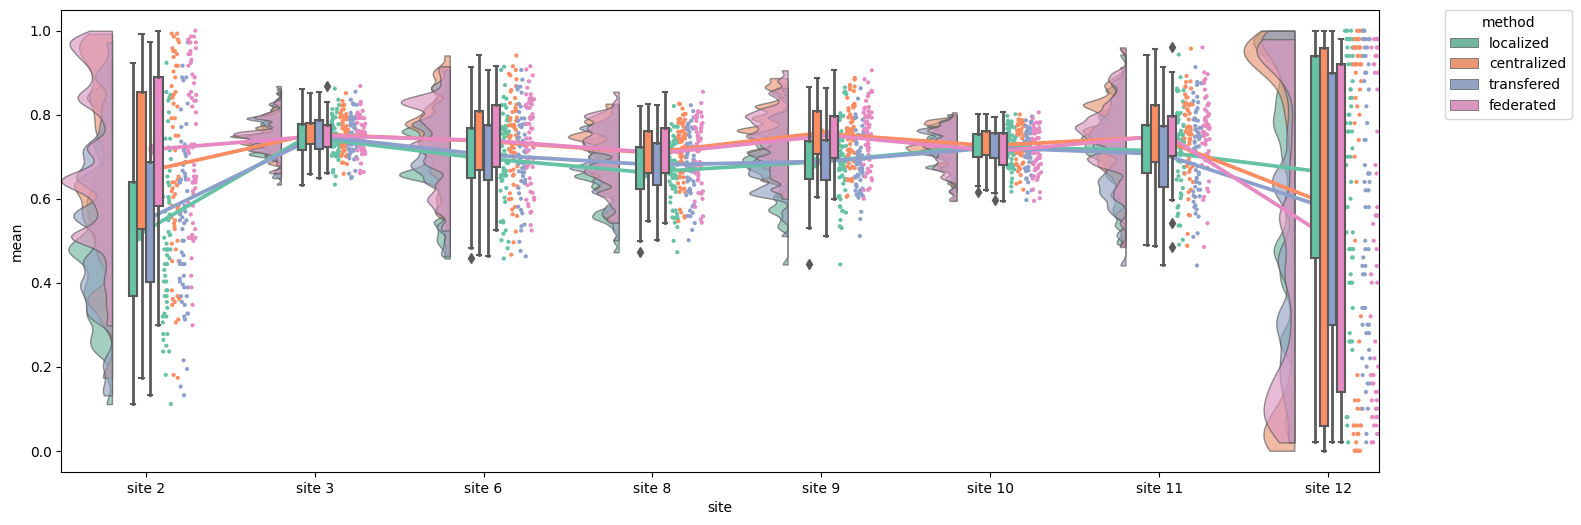

In [25]:
testdf = pd.concat([testdf1, testdf2, testdf3, testdf4])
f, ax = plt.subplots(figsize=(17, 6))
ax = pt.RainCloud( x = "site", y = "mean", hue = 'method', data =testdf, orient='v', palette='Set2', width_box=.2, width_viol = .6, bw=.1, pointplot=True, move=0.2, alpha=.65, dodge=True)


## Target encoding result

In [7]:
local1 = pd.read_csv('../output_folder/target_new/local_val_df_(0.001,0.0005).csv', index_col=[0])
local2 = pd.read_csv('../output_folder/target_new/local_val_df_(0.0001,0.0005).csv', index_col=[0])
local3 = pd.read_csv('../output_folder/target_new/local_val_df_(0.001,0).csv', index_col=[0])
local4 = pd.read_csv('../output_folder/target_new/local_val_df_(0.0001,0).csv', index_col=[0])
'''local5 = pd.read_csv('../output_folder/target/local_val_df_(1-4,5-4).csv', index_col=[0])
local6 = pd.read_csv('../output_folder/target_new/local_val_df_(0.001,0.0005).csv', index_col=[0])'''
target_local_df = pd.DataFrame(data=[local1.mean(),local2.mean(),local3.mean(),local4.mean()], index=['(0.001,0.0005)', '(0.0001,0.0005)', '(0.001,0)', '(0.0001,0)'])
target_local_df.to_csv('target_local_comp.csv')

In [8]:
central1 = pd.read_csv('../output_folder/target_new/centralized_score_(0.001,0.0005).csv', index_col=[0])
central2 = pd.read_csv('../output_folder/target_new/centralized_score_(0.0001,0.0005).csv', index_col=[0])
central3 = pd.read_csv('../output_folder/target_new/centralized_score_(0.001,0).csv', index_col=[0])
central4 = pd.read_csv('../output_folder/target_new/centralized_score_(0.0001,0).csv', index_col=[0])

target_central_df = pd.DataFrame(data=[central1.mean(),central2.mean(),central3.mean(),central4.mean()], index=['(0.001,0.0005)', '(0.0001,0.0005)','(0.001,0)', '(0.0001,0)'])
target_central_df['std'] = [target_central_df.loc[i].std() for i in target_central_df.index]
average_list = []
for ind in target_central_df.index:
    temp = 0
    for i in ratio_dict.keys():
        temp+=target_central_df.loc[ind][i]*ratio_dict[i]

    average_list.append(temp)
target_central_df['weighted average'] = average_list
target_central_df.to_csv('target_central_comp.csv')

In [9]:
transfer1 = pd.read_csv('../output_folder/target_new/transfer_score_(0.001,0.0005).csv', index_col=[0])
transfer2 = pd.read_csv('../output_folder/target_new/transfer_score_(0.0001,0.0005).csv', index_col=[0])
transfer3 = pd.read_csv('../output_folder/target_new/transfer_score_(0.001,0).csv', index_col=[0])
transfer4 = pd.read_csv('../output_folder/target_new/transfer_score_(0.0001,0).csv', index_col=[0])

target_transfer_df = pd.DataFrame(data=[transfer1.mean(),transfer2.mean(),transfer3.mean(),transfer4.mean()], index=['(0.001,0.0005)', '(0.0001,0.0005)','(0.001,0)', '(0.0001,0)'])
target_transfer_df['std'] = [target_transfer_df.loc[i].std() for i in target_transfer_df.index]
average_list = []
for ind in target_transfer_df.index:
    temp = 0
    for i in ratio_dict.keys():
        temp+=target_transfer_df.loc[ind][i]*ratio_dict[i]

    average_list.append(temp)
target_transfer_df['weighted average'] = average_list
target_transfer_df.to_csv('target_transfer_comp.csv')

In [10]:
fed1 = pd.DataFrame()
fed2 = pd.DataFrame()
fed3 = pd.DataFrame()
fed4 = pd.DataFrame()

for i in [2,3,6,8,9,10,11,12]:
    fed1[f'site{i}'] = pd.read_csv(f'../output_folder/target_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-3/5-4)']
    fed2[f'site{i}'] = pd.read_csv(f'../output_folder/target_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-4/5-4)']
    fed3[f'site{i}'] = pd.read_csv(f'../output_folder/target_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-3/0)']
    fed4[f'site{i}'] = pd.read_csv(f'../output_folder/target_new/df_fedavg_average{i}.csv',index_col=[0])[f'site{i}_(1-4/0)']
    
target_fed_df = pd.DataFrame(data = [fed1.mean(),fed2.mean(),fed3.mean(),fed4.mean()], index=['(0.001,0.0005)','(0.0001,0.0005)','(0.001,0)','(0.0001,0)'])
target_fed_df['std'] = [target_fed_df.loc[i].std() for i in target_fed_df.index]
average_list = []
for ind in target_fed_df.index:
    temp = 0
    for i in ratio_dict.keys():
        temp+=target_fed_df.loc[ind][i]*ratio_dict[i]
    average_list.append(temp)
target_fed_df['weighted average'] = average_list
target_fed_df.to_csv('target_fed_comp.csv')

In [7]:
def concat4hos(df,method):
    temp = pd.concat([df['site2'],df['site3'],df['site6'],df['site8']])
    temp = pd.DataFrame(temp,columns=['mean'])
    temp['site'] = ['site 2']*61+['site 3']*61+['site 6']*61+['site 8']*61
    temp['method'] = method
    return temp

def concat8hos(df,method):
    temp = pd.concat([df['site2'],df['site3'],df['site6'],df['site8'],df['site9'],df['site10'],df['site11'],df['site12']])
    temp = pd.DataFrame(temp,columns=['mean'])
    temp['site'] = ['site 2']*61+['site 3']*61+['site 6']*61+['site 8']*61+['site 9']*61+['site 10']*61+['site 11']*61+['site 12']*61
    temp['method'] = method
    return temp

Text(0.5, 0, 'Site')

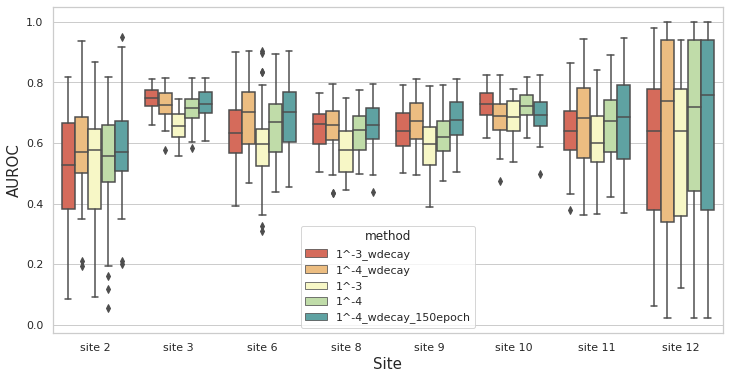

In [10]:
local1 = concat8hos(localdf1,'1^-3_wdecay')
local2 = concat8hos(localdf2,'1^-4_wdecay')
local3 = concat8hos(localdf3,'1^-3')
local4 = concat8hos(localdf4,'1^-4')
local5 = concat8hos(localdf5,'1^-4_wdecay_150epoch')
boxplot_data = pd.concat([local1,local2,local3,local4,local5])
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot_data, palette="Spectral",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)

In [49]:
# fill 10 的結果
local = concat4hos(local_df,'Localized Learning')
central = concat4hos(centralized_df,'Centralized Learning')
df_fedavg = concat4hos(fedavg, 'Fedavg (average)')
df_transfer = concat4hos(transfer, 'Transfer (average)')
boxplot_4_ten = pd.concat([df_fedavg,local,df_transfer,central])
df4_ten = pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

In [9]:
# fill_median
local = concat4hos(local_df,'Localized Learning')
central = concat4hos(centralized_df,'Centralized Learning')
df_fedavg = concat4hos(fedavg, 'Fedavg (average)')
df_transfer = concat4hos(transfer, 'Transfer (average)')
boxplot_4_median = pd.concat([df_fedavg,local,df_transfer,central])
df4_median = pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])


In [11]:
# fill_median
local = concat8hos(local_df,'Localized Learning')
central = concat8hos(centralized_df,'Centralized Learning')
df_fedavg = concat8hos(fedavg, 'Fedavg (average)')
df_transfer = concat8hos(transfer, 'Transfer (average)')
boxplot_8_median = pd.concat([df_fedavg,local,df_transfer,central])
df8_median = pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

In [45]:
# iterative imputation
local = concat4hos(local_df,'Localized Learning')
central = concat4hos(centralized_df,'Centralized Learning')
df_fedavg = concat4hos(fedavg, 'Fedavg (average)')
df_transfer = concat4hos(transfer, 'Transfer (average)')
boxplot_4_iterate = pd.concat([df_fedavg,local,df_transfer,central])
df4_iterate = pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

In [6]:
# iterative imputation
local = concat8hos(local_df,'Localized Learning')
central = concat8hos(centralized_df,'Centralized Learning')
df_fedavg = concat8hos(fedavg, 'Fedavg (average)')
df_transfer = concat8hos(transfer, 'Transfer (average)')
boxplot_8_iterate = pd.concat([df_fedavg,local,df_transfer,central])
df8_iterate = pd.DataFrame(data=[fedavg.mean(), local_df.mean(), transfer.mean(), centralized_df.mean()],index =['Federated Learning (average)', 'Localized Learning' ,'Transfer Learning (average)', 'Centralized Learning'])

In [ ]:
'''
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 
'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 
'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 
'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''

Text(0.5, 0, 'Site')

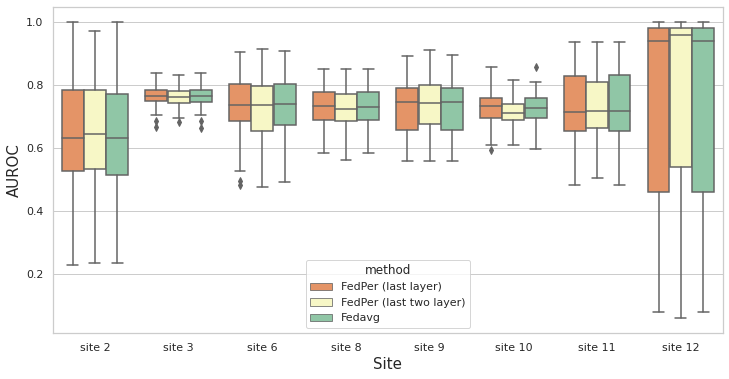

In [18]:
dffedavg = concat8hos(baseline, 'Fedavg')
dffedper1 = concat8hos(last_layer, 'FedPer (last layer)')
dffedper2 = concat8hos(last_two_layer, 'FedPer (last two layer)')
boxplot_data = pd.concat([dffedper1,dffedper2,dffedavg])

sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot_data, palette="Spectral",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)

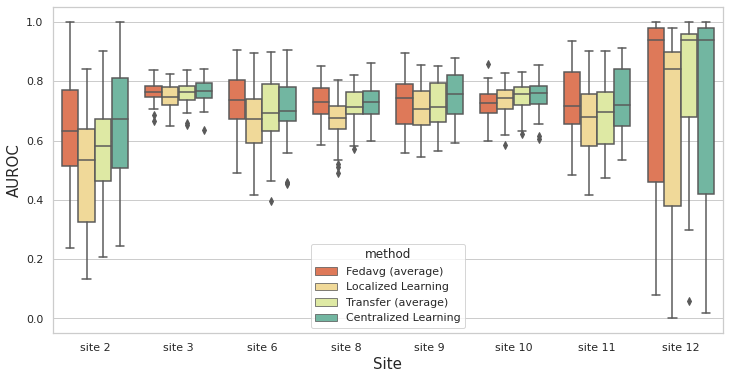

In [12]:
filename = 'fill_10'
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
ax = sns.boxplot(x = 'site',y='mean',hue='method',data=boxplot_8_median, palette="Spectral",linewidth=1.5)
ax.set_ylabel("AUROC",fontsize=15)
ax.set_xlabel("Site",fontsize=15)
plt.savefig('/home/refu0917/lungcancer/remote_output1/img_folder/'+filename)

In [26]:
import scipy.stats as stats
from scipy.stats import shapiro
site2 = testdf[testdf['site'] == 'site 2']
site3 = testdf[testdf['site'] == 'site 3']
site6 = testdf[testdf['site'] == 'site 6']
site8 = testdf[testdf['site'] == 'site 8']
site9 = testdf[testdf['site'] == 'site 9']
site10 = testdf[testdf['site'] == 'site 10']
site11 = testdf[testdf['site'] == 'site 11']
site12 = testdf[testdf['site'] == 'site 12']


def split_method(df):
    fl = df[df['method'] == 'federated']
    cl = df[df['method'] == 'centralized']
    tl = df[df['method'] == 'transfered']
    ll = df[df['method'] == 'localized']
    return fl, cl, tl, ll

def check_distribution(df):
    print(np.unique(df.site))
    fl, cl,tl,ll = split_method(df)
    
    for i,j in zip([fl, cl,tl,ll],['Federated Learning','Centralized Learning','Transfer Learning','Localized Learning']):
        stat,p = shapiro(i['mean'])
        if p > 0.05:
            print(f'{j} pvalue={p} --> normal distribution')
        else:
            print(f'{j} pvalue={p} --> non-normal distribution')
    return

In [28]:
check_distribution(site2) #-->kruskal wallis
check_distribution(site3) #-->anova
check_distribution(site6) #-->anova
check_distribution(site8) #-->kruskal wallis
check_distribution(site9) #-->anova
check_distribution(site10) #-->kruskal wallis
check_distribution(site11) #-->anova
check_distribution(site12) #-->kruskal wallis

['site 2']
Federated Learning pvalue=0.01492686290293932 --> non-normal distribution
Centralized Learning pvalue=0.028412211686372757 --> non-normal distribution
Transfer Learning pvalue=0.783158004283905 --> normal distribution
Localized Learning pvalue=0.35201296210289 --> normal distribution
['site 3']
Federated Learning pvalue=0.4980619549751282 --> normal distribution
Centralized Learning pvalue=0.9279135465621948 --> normal distribution
Transfer Learning pvalue=0.6601013541221619 --> normal distribution
Localized Learning pvalue=0.9679712057113647 --> normal distribution
['site 6']
Federated Learning pvalue=0.0872793197631836 --> normal distribution
Centralized Learning pvalue=0.33838680386543274 --> normal distribution
Transfer Learning pvalue=0.5208779573440552 --> normal distribution
Localized Learning pvalue=0.2521100342273712 --> normal distribution
['site 8']
Federated Learning pvalue=0.19228139519691467 --> normal distribution
Centralized Learning pvalue=0.0337541475892066

# Site 2,8,10,12 Kruskal Wallis

In [59]:
import scikit_posthocs as sp
# 非常態分佈用kruskal wallis ，若kruskal wallis有顯著差異(p<0.05)，再用Dunn檢定，比較組內兩兩有無顯著差異(p<0.05)
def kruskal_wallis(df):
    print(np.unique(df.site))
    fl,cl,tl,ll = split_method(df)
    result = stats.kruskal(fl['mean'], cl['mean'], tl['mean'], ll['mean'])
    if result[1] < 0.05:
        print(f'{result[1]} , rejected h0')
    else:
        print(f'{result[1]} , do not rejected h0')
    # post hoc
    data = [fl['mean'], cl['mean'], tl['mean'], ll['mean']]
    
    p_values= sp.posthoc_dunn(df, val_col='mean', group_col='method', p_adjust='bonferroni')
    #p_values = sp.posthoc_conover(df, val_col='mean', group_col='method')
    p_values = pd.DataFrame(p_values)
    p_values = p_values.rename(columns={1:"Federated",2:"Centralized",3:"Transfered",4:"Localized"},index={1:"Federated",2:"Centralized",3:"Transfered",4:"Localized"})
    #print(p_values < 0.05)
    return pd.DataFrame(p_values)

site2_p_value = kruskal_wallis(site2)   # 組內"有"顯著差異
site8_p_value = kruskal_wallis(site8)   # 組內"有"顯著差異
site10_p_value = kruskal_wallis(site10) # 組內"無"顯著差異
site12_p_value = kruskal_wallis(site12) # 組內"無"顯著差異

['site 2']
1.1778496224937514e-07 , rejected h0
['site 8']
0.0015707498135102008 , rejected h0
['site 10']
0.5320389154121676 , do not rejected h0
['site 12']
0.1276409881091606 , do not rejected h0


In [57]:
site2_p_value

,centralized,federated,localized,transfered
centralized,1.000000,1.522525e-01,1.272270e-04,0.006821
federated,0.152252,1.000000e+00,1.414263e-07,0.000035
localized,0.000127,1.414263e-07,1.000000e+00,0.260034
transfered,0.006821,3.517608e-05,2.600340e-01,1.000000


In [55]:
site2_p_value # CL、FL無顯著差異/ CL、LL有顯著差異/ CL、TL有顯著差異/ FL、LL有顯著差異/ FL、TL有顯著差異/ TL、LL有顯著差異/

,centralized,federated,localized,transfered
centralized,1.000000,9.135149e-01,7.633619e-04,0.040927
federated,0.913515,1.000000e+00,8.485576e-07,0.000211
localized,0.000763,8.485576e-07,1.000000e+00,1.000000
transfered,0.040927,2.110565e-04,1.000000e+00,1.000000


In [60]:
site8_p_value # CL、FL無顯著差異/ CL、LL有顯著差異/ CL、TL有顯著差異/ FL、LL有顯著差異/ FL、TL有顯著差異/ TL、LL無顯著差異/

,centralized,federated,localized,transfered
centralized,1.000000,1.000000,0.005596,0.207786
federated,1.000000,1.000000,0.009784,0.304955
localized,0.005596,0.009784,1.000000,1.000000
transfered,0.207786,0.304955,1.000000,1.000000


In [33]:
site10_p_value

,centralized,federated,localized,transfered
centralized,1.000000,0.169305,0.816403,0.700848
federated,0.169305,1.000000,0.253343,0.322045
localized,0.816403,0.253343,1.000000,0.879185
transfered,0.700848,0.322045,0.879185,1.000000


In [34]:
site12_p_value

,centralized,federated,localized,transfered
centralized,1.000000,0.178043,0.302857,0.861891
federated,0.178043,1.000000,0.017448,0.240861
localized,0.302857,0.017448,1.000000,0.228476
transfered,0.861891,0.240861,0.228476,1.000000


# Site 3, 6, 9, 11 ANOVA

In [46]:
import statsmodels.stats.multicomp as mc
def oneway_anova(df):
    print(f'{np.unique(df.site)} anova analysis result : ')
    fl, cl, tl, ll = split_method(df)
    # one - way anova
    result = scipy.stats.f_oneway(fl['mean'], cl['mean'], tl['mean'], ll['mean'])  
    if result[1] < 0.05:
        print(f'{result[1]} , rejected h0')
    else:
        print(f'{result[1]} , do not rejected h0')
    # post hoc
    comp = mc.MultiComparison(df['mean'],df['method'])
    # bonferroni
    #tbl_bonf, _, _ = comp.allpairtest(stats.ttest_ind, method= "bonf")
    #print(tbl_bonf)
    # sidak
    tbl_sidak, _, _ = comp.allpairtest(stats.ttest_ind, method= "sidak")
    print(tbl_sidak)
    
    # tukey 
    #post_hoc_res = comp.tukeyhsd()
    #print(post_hoc_res.summary())
    # scheffe
    

In [47]:
oneway_anova(site3) # 組間無顯著差異

['site 3'] anova analysis result : 
0.8325927357290626 , do not rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
   group1     group2     stat   pval  pval_corr reject
------------------------------------------------------
centralized  federated  0.4468 0.6558    0.9983  False
centralized  localized  0.9142 0.3624    0.9328  False
centralized transfered  0.6084 0.5441     0.991  False
  federated  localized  0.4871 0.6271    0.9973  False
  federated transfered  0.1831  0.855       1.0  False
  localized transfered -0.2903 0.7721    0.9999  False
------------------------------------------------------


In [48]:
oneway_anova(site6)#組間無顯著差異

['site 6'] anova analysis result : 
0.055925157939827316 , do not rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
   group1     group2     stat   pval  pval_corr reject
------------------------------------------------------
centralized  federated -0.0323 0.9743       1.0  False
centralized  localized  2.0397 0.0436    0.2346  False
centralized transfered  1.7305 0.0861    0.4174  False
  federated  localized  2.1624 0.0326    0.1802  False
  federated transfered  1.8423 0.0679    0.3442  False
  localized transfered -0.3416 0.7333    0.9996  False
------------------------------------------------------


In [49]:
oneway_anova(site9)# 組間有顯著差異

['site 9'] anova analysis result : 
2.4263504991750575e-09 , rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
   group1     group2     stat   pval  pval_corr reject
------------------------------------------------------
centralized  federated  0.4121  0.681    0.9989  False
centralized  localized  4.8202    0.0       0.0   True
centralized transfered  5.2308    0.0       0.0   True
  federated  localized   4.495    0.0    0.0001   True
  federated transfered  4.8807    0.0       0.0   True
  localized transfered -0.1217 0.9033       1.0  False
------------------------------------------------------


In [50]:
oneway_anova(site11)

['site 11'] anova analysis result : 
0.020074389874831733 , rejected h0
Test Multiple Comparison ttest_ind 
FWER=0.05 method=sidak
alphacSidak=0.01, alphacBonf=0.008
   group1     group2     stat   pval  pval_corr reject
------------------------------------------------------
centralized  federated -0.2491 0.8037    0.9999  False
centralized  localized  1.8294 0.0698    0.3523  False
centralized transfered  2.2518 0.0262     0.147  False
  federated  localized  2.1562 0.0331    0.1827  False
  federated transfered  2.5844  0.011     0.064  False
  localized transfered  0.4681 0.6405    0.9978  False
------------------------------------------------------
